In [1]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator

Finding the best optimization values:

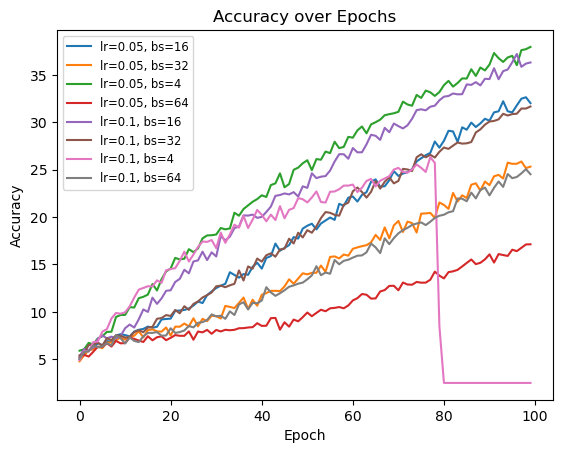

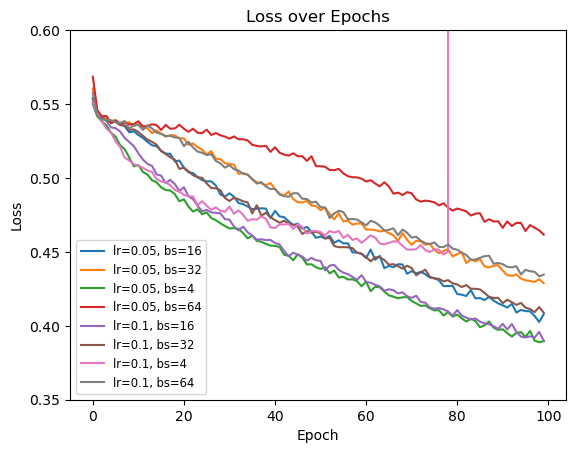

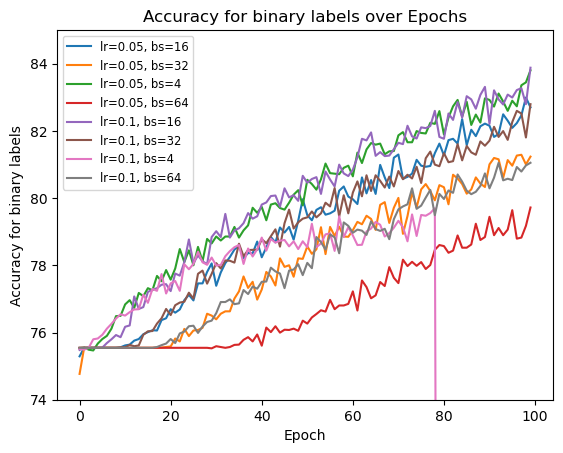

In [11]:
# Path to the main directory where all runs are stored
main_log_dir = r"A:\3rd_Year_Project\Project_code\runs\optimisation"
# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Accuracy'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel(target_tag)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Loss'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel(target_tag)
plt.ylim(0.35, 0.6)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

# Pick the tag you're interested in (e.g., 'Loss' or 'Accuracy')
target_tag = 'Accuracy for binary labels'  # or 'Loss'

#plt.figure(figsize=(10, 6))

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.plot(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag} over Epochs')
plt.xlabel('Epoch')
plt.ylabel(target_tag)
plt.ylim(74, 85)
plt.legend(loc='best', fontsize='small')
#plt.grid(True)
#plt.tight_layout()
plt.show()

Accuracy per framenumber

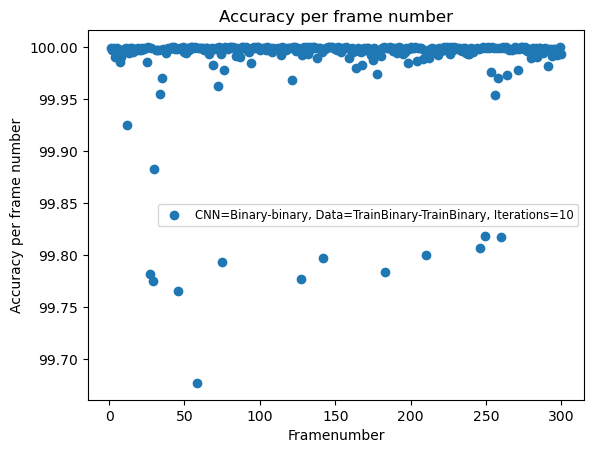

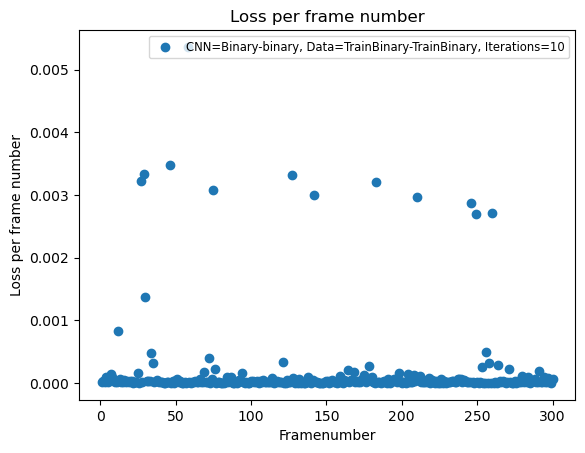

In [17]:
# Path to the main directory where all runs are stored
main_log_dir = r"A:\3rd_Year_Project\Project_code\runs\framenumber"
#tag of what we want to look at
target_tag = 'Accuracy per frame number'

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.scatter(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag}')
plt.xlabel('Framenumber')
plt.ylabel(target_tag)
#plt.ylim(99.6, 100)
plt.legend(loc='best', fontsize='small')
plt.show()


target_tag = 'Loss per frame number'

for run_name in os.listdir(main_log_dir):
    run_dir = os.path.join(main_log_dir, run_name)
    if not os.path.isdir(run_dir):
        continue

    ea = event_accumulator.EventAccumulator(run_dir)
    try:
        ea.Reload()
        if target_tag not in ea.Tags()['scalars']:
            continue

        events = ea.Scalars(target_tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        # Plot each run
        plt.scatter(steps, values, label=run_name)
    except Exception as e:
        print(f"Skipping {run_name}: {e}")

plt.title(f'{target_tag}')
plt.xlabel('Framenumber')
plt.ylabel(target_tag)
#plt.ylim(0, 0.00005)
plt.legend(loc='best', fontsize='small')
plt.show()

['frameNumber', 'Accuracy', 'stdAcc', 'Loss', 'LossStd']


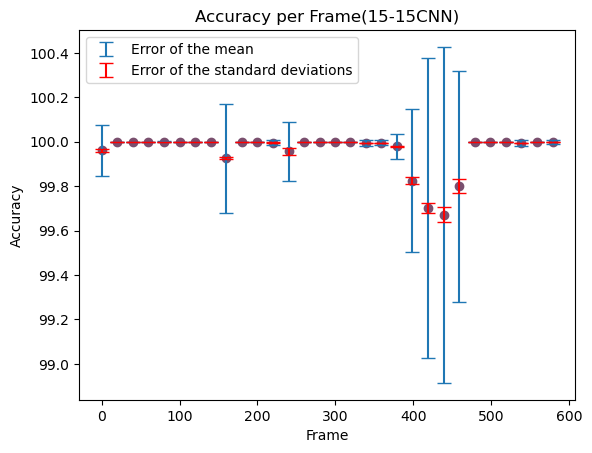

In [7]:
#Getting the graphs from the
framenumber_file = np.load("Acc_per_frame_CNN=15.npzAlmost, Data=trainBinary-trainBinary, Iterations=100.npz")
print(framenumber_file.files)

framenumber = framenumber_file["frameNumber"]
sorted_framenumber = np.argsort(framenumber) #tells different elements in framenumber to go to different indexes such that framenumebr is ascending
framenumber = framenumber[sorted_framenumber]
accuracy = framenumber_file["Accuracy"]
accuracy = accuracy[sorted_framenumber]
stdAcc = framenumber_file["stdAcc"]
stdAcc = stdAcc[sorted_framenumber]
loss = framenumber_file["Loss"]
loss = loss[sorted_framenumber]
lossstd = framenumber_file["LossStd"]
lossstd = lossstd[sorted_framenumber]#reorder all of the others such that they are all perfectly aligned to framenumber

no_of_bins = 30
max_frame = np.max(framenumber)
no_needed = max_frame/(no_of_bins)
binned_framenumber = np.round((np.round(framenumber/no_needed))*no_needed)
#print(binned_framenumber)

prev=framenumber[0]
bin_frame = []
mean_acc = []
std_acc = []
std_acc1 = []
meanAcc = []
StdAcc = []
stdAcc1 = []

for i, value in enumerate(binned_framenumber):
    if value != prev:
        bin_frame.append(prev)

        meanAcc.append(np.mean(mean_acc))
        StdAcc.append(np.std(mean_acc))
        stdAcc1.append(
            np.sqrt(
            np.sum(
            np.array(std_acc1)**2
            ))
        /(np.mean(mean_acc)))

        mean_acc = []
        std_acc = []
        std_acc1 = []
        prev=value
    if value == prev:
        mean_acc.append(accuracy[i])
        std_acc.append(accuracy[i])
        std_acc1.append(stdAcc[i])

#print(len(meanAcc))
#print(len(bin_frame))
#print(len(stdAcc1))

plt.title(f'Accuracy per Frame(15-15CNN)')
plt.xlabel('Frame')
plt.ylabel("Accuracy")
#plt.xlim(0, 300)
#plt.ylim(80, 100)
plt.errorbar(bin_frame, meanAcc, yerr=StdAcc, linestyle="None", capsize=5, ecolor="#1f77b4", label="Error of the mean")
plt.errorbar(bin_frame, meanAcc, yerr=stdAcc1, linestyle="None", ecolor="red", capsize=5, label="Error of the standard deviations")
plt.scatter(bin_frame, meanAcc, color="#7a4f6e")
plt.legend()
plt.show()

#plt.title("Loss per Frame")
#plt.xlabel('Frame')
#plt.ylabel("Loss")
#plt.scatter(binned_framenumber, loss)
#plt.show()